In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
perch_lenght = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = \
    train_test_split(perch_lenght, perch_weight, random_state=42)

In [7]:
print(train_input)
print('-------------------------------')
print(test_input) 
print('-------------------------------')
print(train_target)
print('-------------------------------')
print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
-------------------------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
-------------------------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
-------------------------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [14]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [58]:
knr.score(test_input, test_target)

0.9746459963987609

In [64]:
nfish = [[100]]

In [66]:
knr.predict(nfish)

array([1033.33333333])

In [67]:
# 사용된 이웃값 확인하기
# - 모델 생성시 디폴트 n_neighbors=5개
# - n_neighbors 값을 추출하기 위해 kneighbors() 함수 사용
# - 첫번째 값 : n_neighbors의 값
# - 두번째 값 : 첫번째 값의 인덱스 번호
distances, indexes = knr.kneighbors(nfish)
print(distances)
print(indexes)

[[56. 57. 57.]]
[[34  8 14]]


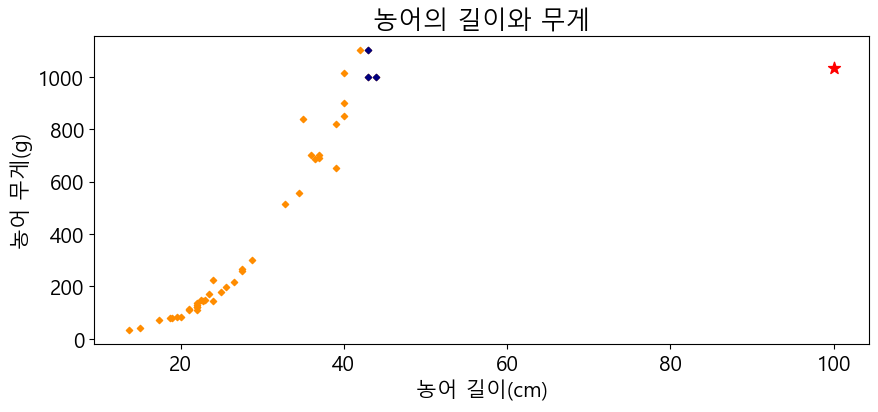

In [68]:
fig = plt.figure(figsize=(10,4))
plt.rc('font', family = 'Malgun Gothic', size = 15)
plt.title('농어의 길이와 무게')
plt.scatter(train_input, train_target,marker='D',s = 10,c ='darkorange')
plt.scatter(train_input[indexes],train_target[indexes],marker='D',s = 10,c ='navy')
plt.scatter(nfish, knr.predict(nfish),marker='*',s = 80,c ='red')
plt.xlabel('농어 길이(cm)')
plt.ylabel('농어 무게(g)')
plt.show()